In [1]:
# importing libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [3]:
# reading csv
data_h=pd.read_excel("D:/DATA SCIENCE/ASSIGNMENT CSV/Assignment xlsx/EastWestAirlines.xlsx", sheet_name='data',index_col='ID#')

In [5]:
data_h.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
data_h.shape

(3999, 11)

In [7]:
data_h.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
data_h.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
# normlization function
def norm_func(i):
    x =(i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
# Normalized dataframe ( considering the numarical part of data)
df_norm= norm_func(data_h)

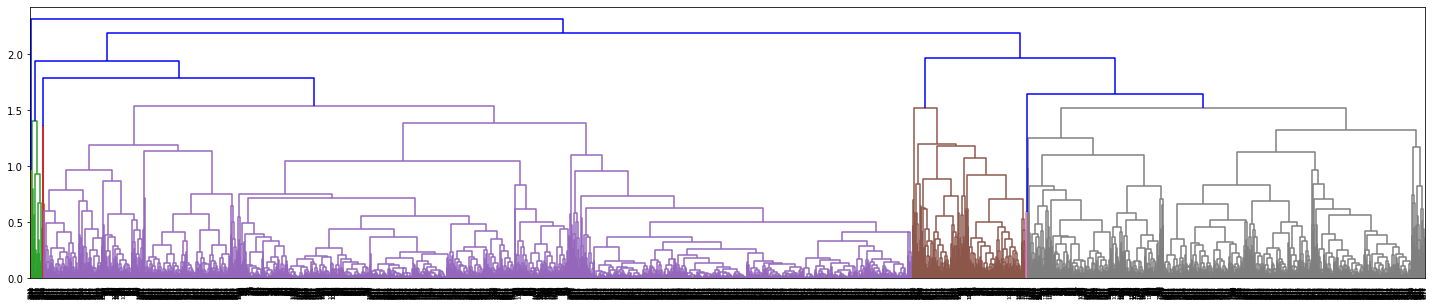

In [12]:
plt.figure(figsize=(25, 5))
dendogram= sch.dendrogram(sch.linkage(df_norm, method='complete'),above_threshold_color='blue')

## it is dificult to understand the dendrogram as the dataset is big

In [13]:
# creating cluster
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete') # we are using complete linkage here

In [15]:
# saving cluster for chart
y_hc =hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [16]:
cluster_lables=pd.Series(hc.labels_)

In [18]:
hc.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [19]:
data_h['h_clusterid']=hc.labels_

In [20]:
data_h.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
6,16420,0,1,1,1,0,0,0,0,6942,0,0
7,84914,0,3,1,1,27482,25,0,0,6994,0,0
8,20856,0,1,1,1,5250,4,250,1,6938,1,2
9,443003,0,3,2,1,1753,43,3850,12,6948,1,2


In [21]:
data_h.h_clusterid.value_counts()

0    2526
2    1144
1     325
3       4
Name: h_clusterid, dtype: int64

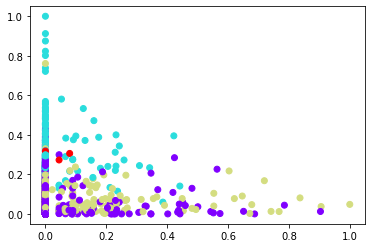

In [22]:
plt.scatter(x=df_norm['Qual_miles'], y=df_norm['Bonus_miles'],c=cluster_lables, cmap='rainbow')

## since dataset is big hierachical  clustering is not suitable for creating cluster

# K means clustering

In [24]:
from sklearn.cluster import KMeans

In [25]:
data_k=pd.read_excel("D:/DATA SCIENCE/ASSIGNMENT CSV/Assignment xlsx/EastWestAirlines.xlsx", sheet_name='data',index_col='ID#')

In [26]:
data_k.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [27]:
# Normalized data frame  (considering numerical part of data)
df_norm=norm_func(data_k)

## Finding optimum number of cluster using within-cluster some-of-square criterion or elbow method 

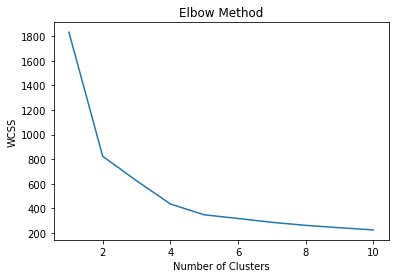

In [29]:
wcss=[]
for i in range (1, 11):
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## from the above  elbow method optimum cluster number is 4

In [30]:
# build cluster algorithm
from sklearn.cluster import KMeans
clusters_new=KMeans(4, random_state=42)
clusters_new.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [31]:
clusters_new.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [32]:
# Assign cluster to the dataset
data_k['clusterid_new'] = clusters_new.labels_

In [33]:
# these are standardize values.
clusters_new.cluster_centers_

array([[ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01,  3.33066907e-15],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -4.44089210e-16]])

In [34]:
data_k.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0
1,1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1
2,2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1
3,3,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0


In [36]:
data_k.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [37]:
data_k.clusterid_new.value_counts()

0    1897
1     808
2     673
3     621
Name: clusterid_new, dtype: int64

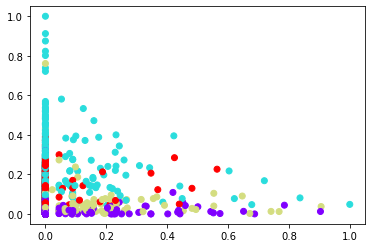

In [38]:
plt.scatter(x=df_norm['Qual_miles'], y=df_norm['Bonus_miles'], c=clusters_new.labels_, cmap='rainbow')

# DB SCAN

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
# reading csv file
data_db =pd.read_excel("D:/DATA SCIENCE/ASSIGNMENT CSV/Assignment xlsx/EastWestAirlines.xlsx", sheet_name='data',index_col='ID#')

In [41]:
data_db

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [42]:
# Normalized data frame ( considering the numerical data)
df_norm=norm_func(data_db)

In [43]:
dbscan= DBSCAN(eps=0.8, min_samples=15)
dbscan.fit(df_norm)

DBSCAN(eps=0.8, min_samples=15)

In [44]:
# Noisy samples are given the label-1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
db_clusters =pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [47]:
db_clusters.head(5)

,cluster
0,0
1,0
2,0
3,0
4,1


In [48]:
new_data=pd.concat([data_db,db_clusters],axis=1)

In [49]:
new_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0.0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0.0
3,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,0.0
4,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476.0,0.0,1.0,1.0,1.0,8525.0,4.0,200.0,1.0,1403.0,1.0,NaN
4018,64385.0,0.0,1.0,1.0,1.0,981.0,5.0,0.0,0.0,1395.0,1.0,NaN
4019,73597.0,0.0,3.0,1.0,1.0,25447.0,8.0,0.0,0.0,1402.0,1.0,NaN
4020,54899.0,0.0,1.0,1.0,1.0,500.0,1.0,500.0,1.0,1401.0,0.0,NaN


In [50]:
new_data.cluster.value_counts()

0.0    2518
1.0    1481
Name: cluster, dtype: int64